In [1]:
### --- importing the  libraries
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec
import os, glob, itertools
import statsmodels.api as sm
import statsmodels.formula.api as smf
from matplotlib.collections import LineCollection
from networkx.algorithms import degree_centrality
from networkx.algorithms import eigenvector_centrality
from networkx.algorithms import betweenness_centrality
from sklearn.metrics.pairwise import cosine_similarity
from networkx.algorithms.community import girvan_newman, modularity
from networkx.algorithms.community import greedy_modularity_communities
from pprint import pprint as pp
from itertools import combinations

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
### --- loading the xml file 
G = nx.read_graphml('trading_floor.xml')

In [4]:
### --- creating a dataframe 
df = pd.DataFrame.from_dict(dict(G.nodes(data = True)), orient = "index")
df.T

0  1  2  3  4  5  6  7  8   9  ...  182  183  184  185  186  187  188  \
ai     4  4  4  4  7  4  4  5  7  10  ...    2    3    1    4    2   10    0   
x_pos  1  1  1  1  1  1  1  1  1   1  ...   22   22   22   22   22   22   22   
y_pos  0  1  2  3  4  5  6  7  8   9  ...    6    7    8    9   10   11   12   

       189  190  191  
ai       8    9    6  
x_pos   22   22   22  
y_pos   13   14   15  

[3 rows x 192 columns]

'Graph with 192 nodes and 384 edges'


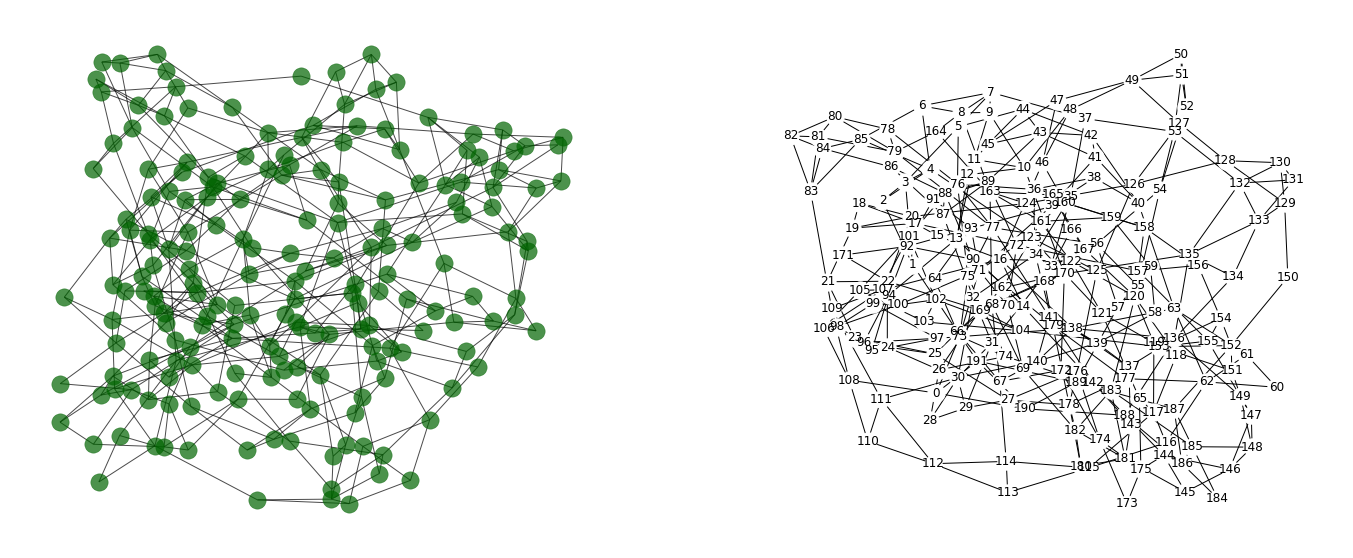

In [5]:
# --- plotting the network

fig = plt.figure(1,figsize=(24, 10))

pos = nx.layout.spring_layout(G)
ax0 = fig.add_subplot(1, 2, 1)
ax = fig.add_subplot(1, 2, 2)

options = {'node_color': 'darkgreen',
           'alpha': 0.7,
           'linewidths': 0.5,
           'with_labels': False,
           'font_color': 'black'}
ax0.axis('off')
nx.draw_networkx(G,pos = pos, **options , ax = ax0)

### --- inspect the networkx   
# basic info

pp(nx.info(G))

# --- draw the network

pos = nx.spring_layout(G)
nx.draw(G, pos, alpha=1, node_color='white')
nx.draw_networkx_labels(G, pos, ax = ax)
plt.axis("off")


plt.show()

     eigenvector_centrality  closeness_centrality  betweenness_centrality  \
0                  0.042633              0.216553                0.026085   
1                  0.024720              0.190429                0.008319   
2                  0.028654              0.192735                0.002745   
3                  0.040677              0.206934                0.012934   
4                  0.057392              0.219288                0.030629   
..                      ...                   ...                     ...   
187                0.048295              0.200420                0.017689   
188                0.060757              0.214126                0.019929   
189                0.046085              0.207609                0.021130   
190                0.043420              0.209660                0.014164   
191                0.036603              0.204936                0.014482   

     degree_centrality  
0             0.020942  
1             0.015707  


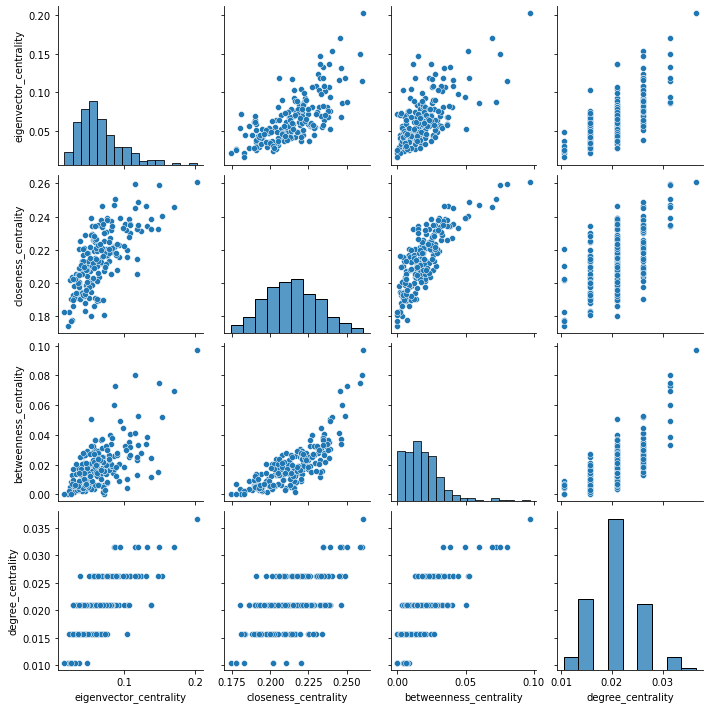

In [6]:
### --- Node distribution centrality plots
# degree of node
degree = degree_centrality(G)
#  degree distribution
dc = nx.degree_centrality(G)
#  eigenvector_centrality
ec = nx.eigenvector_centrality(G)
#  closeness centrality
cc = nx.closeness_centrality(G)
#  betweeness centrality
bc = nx.betweenness_centrality(G)
# save to data frame
df1 = pd.DataFrame({'eigenvector_centrality': ec, 'closeness_centrality': cc,
                   'betweenness_centrality': bc, 'degree_centrality': dc,
                   })
print(df1)
# --- correlation matrix
print(df1.corr()) 
sns.pairplot(df1, palette="RdBu_r") # scatter plot matrix
plt.show()

In [7]:
### --- max and min degree of the nodes
min_degree = min(degree.values())
max_degree = max(degree.values())
print(min_degree, max_degree)

0.010471204188481676 0.03664921465968587


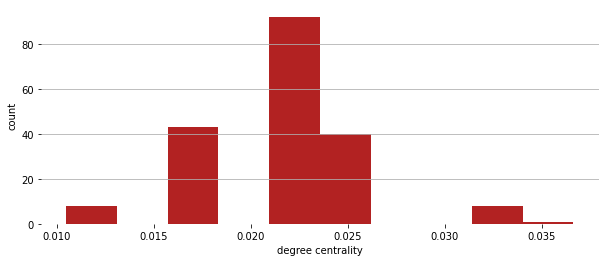

In [8]:
# --- plot the degree centrality
fig = plt.figure(figsize=(10, 4))
ax = fig.add_subplot(1, 1, 1)

ax.hist(list(degree.values()), color='firebrick')
ax.set_xlabel("degree centrality", fontsize=10)
ax.set_ylabel("count", fontsize=10)

ax.grid(ls='-', axis='y')
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)

plt.show()

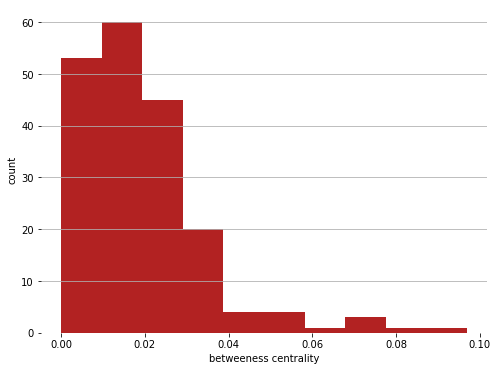

In [9]:
### --- plot betweeness centrality
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(1, 1, 1)

ax.hist(list(bc.values()), color="firebrick")
ax.set_xlabel("betweeness centrality", fontsize=10)
ax.set_ylabel("count", fontsize=10)

ax.grid(ls='-', axis='y')
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)

plt.show()

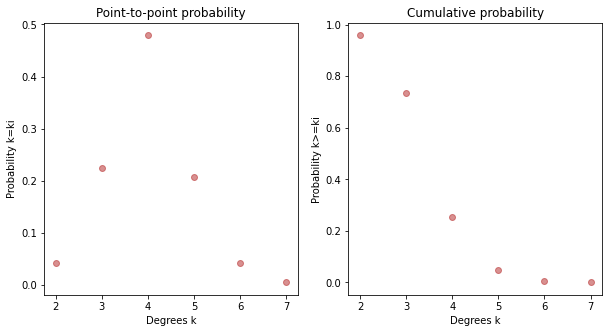

In [10]:
### --- create a list with degree of each node
degrees = sorted([d for n, d in G.degree()],reverse = True)
degrees

pk = np.unique(degrees, return_counts = True)
cpk = np.unique(degrees, return_index = True)

### --- visualising 
fig = plt.figure(figsize=(10, 5))

ax0 = fig.add_subplot(1, 2, 1)
ax1 = fig.add_subplot(1, 2, 2)

ax0.scatter(pk[0], pk[1]/len(degrees), marker = 'o', color = 'firebrick', alpha = 0.5)
ax0.set_title('Point-to-point probability')
ax0.set_xlabel('Degrees k')
ax0.set_ylabel('Probability k=ki')

ax1.scatter(cpk[0], cpk[1]/len(degrees), marker = 'o', color = 'firebrick', alpha = 0.5)
ax1.set_title('Cumulative probability')
ax1.set_xlabel('Degrees k')
ax1.set_ylabel('Probability k>=ki')

plt.show(fig)

# Produce Descriptive Statistics of node-level properties

In [11]:
### --- converting the values of the dictionaries into lists
dc = (list(dc.values()))
bc = (list(bc.values()))
cc = (list(cc.values()))
ec = (list(ec.values()))

In [12]:
### --- Show the descriptive statistics of Degree Centrality

print("""
==============================================
    Summary stats on Degree Centrality
==============================================
Mean  :       {:.2f}
Min   :       {:>5}
Max   :       {:>5}
Sigma :       {:.2f}
""".format( np.mean(list(dc)), np.min(list(dc)),np.max(list(dc)), np.std(list(dc)) ))

### --- Show the descriptive statistics of Betweeness Centrality

print("""
==============================================
    Summary stats on Betweeness Centrality 
==============================================
Mean  :       {:.2f}
Min   :       {:>5}
Max   :       {:>5}
Sigma :       {:.2f}
""".format(np.mean(list(bc)), np.min(list(bc)),np.max(list(bc)), np.std(list(bc))))

### --- Show the descriptive statistics of Closeness Centrality 

print("""
==============================================
    Summary stats on Closeness Centrality 
==============================================
Mean  :       {:.2f}
Min   :       {:>5}
Max   :       {:>5}
Sigma :       {:.2f}
""".format( np.mean(list(cc)), np.min(list(cc)),np.max(list(cc)), np.std(list(cc)) ))

### --- Show the descriptive statistics of Eigenvector Centrality

print("""
==============================================
    Summary stats on Eigenvector Centrality
==============================================
Mean  :       {:.2f}
Min   :       {:>5}
Max   :       {:>5}
Sigma :       {:.2f}
""".format( np.mean(list(ec)), np.min(list(ec)),np.max(list(ec)), np.std(list(ec)) ))


    Summary stats on Degree Centrality
Mean  :       0.02
Min   :       0.010471204188481676
Max   :       0.03664921465968587
Sigma :       0.00


    Summary stats on Betweeness Centrality 
Mean  :       0.02
Min   :         0.0
Max   :       0.09693929777140614
Sigma :       0.02


    Summary stats on Closeness Centrality 
Mean  :       0.21
Min   :       0.1741112123974476
Max   :       0.2609289617486339
Sigma :       0.02


    Summary stats on Eigenvector Centrality
Mean  :       0.07
Min   :       0.01569112458390005
Max   :       0.2020527146046212
Sigma :       0.03



# Assesing the modularity of the Network
### Detecting communities using Girwan-Newman 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


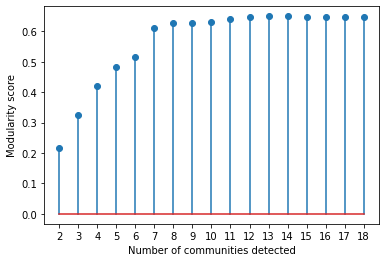

In [13]:
### --- plotting with 13 communities
solutions = girvan_newman(G)
### --- alternative paritioning solutions to consider
k = 17
### --- register modularity scores
modularity_scores = dict()
### --- iterate over solutions
for community in itertools.islice(solutions, k):
    solution = list(sorted(c) for c in community)
    score = modularity(G, solution)
    modularity_scores[len(solution)] = score
### --- plot modularity data
fig = plt.figure()
pos = list(modularity_scores.keys())
values = list(modularity_scores.values())
ax = fig.add_subplot(1, 1, 1)
ax.stem(pos, values)
ax.set_xticks(pos)
ax.set_xlabel(r'Number of communities detected')
ax.set_ylabel(r'Modularity score')
plt.show()

### Based on the modularity score the number of communitites detected on our dataset is 13.

### By using the greedy_modularity_communities function we are going to create a dataframe with the nodes and in which community they belong

In [14]:
### --- finding how many communities this dataset has
communities = list(nx.algorithms.community.greedy_modularity_communities(G))


In [15]:
### --- the plot above shows us the same result as in community number 13 we have the highest modularity
len(communities)

13

So based on both different ways of detecting communities in our dataset, it is observed that the size of 13 communities gives us the highest score about modularity.

Therefore, 13 communities are structured inside this large trading floor located in Canary Wharf. 

In [16]:
### --- creating a dataframe with nodes and in which community every node is detected
commu_df = pd.DataFrame.from_records(communities)
commu_df

0    1    2    3    4    5    6    7    8     9   ...    13    14    15  \
0     8    6   73   77   74   75  163   82    1    85  ...    84    83    81   
1    98   96  100   39   44   43   38   40   45    97  ...   101    95    99   
2    21   20   26   18  166  168  169   15  167   171  ...   170    25   165   
3   162  159   48   54   50   57   53   47   46    51  ...   161    59    58   
4    66   72   68   88   69   90   64   93   71   172  ...    91    92    89   
5    11   12   10  137  143    9   14   13  140   139  ...    16  None  None   
6   177   27   63   62  180   60  176  179  181   116  ...   183  None  None   
7   153  154  157  149  145  156  152  146  155   147  ...   158  None  None   
8   175  173  120  125  117  121  118  119  123   174  ...  None  None  None   
9   135  136  130  126  127  129  131  134  133   132  ...  None  None  None   
10  112  110  113  115  106  107  108  109  105   114  ...  None  None  None   
11   28   32   34   37   36   33   35   29   31    30  ...  None  None  None   
12  191  185  187  184    0  188  190  189  186  None  ...  None  None  None   

      16    17    18    19    20    21    22  
0      7     2     3   164     4    79    78  
1    104    94   103  None  None  None  None  
2     19    24  None  None  None  None  None  
3     49    52  None  None  None  None  None  
4     86  None  None  None  None  None  None  
5   None  None  None  None  None  None  None  
6   None  None  None  None  None  None  None  
7   None  None  None  None  None  None  None  
8   None  None  None  None  None  None  None  
9   None  None  None  None  None  None  None  
10  None  None  None  None  None  None  None  
11  None  None  None  None  None  None  None  
12  None  None  None  None  None  None  None  

[13 rows x 23 columns]

In [17]:
### --- renaming the rows into communities
commu_df = commu_df.rename({0: '1', 1: '2', 2: '3', 3: '4', 4: '5', 5: '6', 6: '7', 7: '8',
                                    8: '9', 9: '10', 10: '11', 11: '12', 12: '13'}, axis = 'index')
commu_df.head()

0    1    2   3    4    5    6   7    8    9   ...   13  14   15   16  \
1    8    6   73  77   74   75  163  82    1   85  ...   84  83   81    7   
2   98   96  100  39   44   43   38  40   45   97  ...  101  95   99  104   
3   21   20   26  18  166  168  169  15  167  171  ...  170  25  165   19   
4  162  159   48  54   50   57   53  47   46   51  ...  161  59   58   49   
5   66   72   68  88   69   90   64  93   71  172  ...   91  92   89   86   

     17    18    19    20    21    22  
1     2     3   164     4    79    78  
2    94   103  None  None  None  None  
3    24  None  None  None  None  None  
4    52  None  None  None  None  None  
5  None  None  None  None  None  None  

[5 rows x 23 columns]

## Transforming our dataframe to make it easier for use 

In [19]:
### --- changing the order of the rows to make it easier in use
df0 = commu_df.reset_index()
df0

index    0    1    2    3    4    5    6    7    8  ...    13    14    15  \
0      1    8    6   73   77   74   75  163   82    1  ...    84    83    81   
1      2   98   96  100   39   44   43   38   40   45  ...   101    95    99   
2      3   21   20   26   18  166  168  169   15  167  ...   170    25   165   
3      4  162  159   48   54   50   57   53   47   46  ...   161    59    58   
4      5   66   72   68   88   69   90   64   93   71  ...    91    92    89   
5      6   11   12   10  137  143    9   14   13  140  ...    16  None  None   
6      7  177   27   63   62  180   60  176  179  181  ...   183  None  None   
7      8  153  154  157  149  145  156  152  146  155  ...   158  None  None   
8      9  175  173  120  125  117  121  118  119  123  ...  None  None  None   
9     10  135  136  130  126  127  129  131  134  133  ...  None  None  None   
10    11  112  110  113  115  106  107  108  109  105  ...  None  None  None   
11    12   28   32   34   37   36   33   35   29   31  ...  None  None  None   
12    13  191  185  187  184    0  188  190  189  186  ...  None  None  None   

      16    17    18    19    20    21    22  
0      7     2     3   164     4    79    78  
1    104    94   103  None  None  None  None  
2     19    24  None  None  None  None  None  
3     49    52  None  None  None  None  None  
4     86  None  None  None  None  None  None  
5   None  None  None  None  None  None  None  
6   None  None  None  None  None  None  None  
7   None  None  None  None  None  None  None  
8   None  None  None  None  None  None  None  
9   None  None  None  None  None  None  None  
10  None  None  None  None  None  None  None  
11  None  None  None  None  None  None  None  
12  None  None  None  None  None  None  None  

[13 rows x 24 columns]

In [20]:
### --- renaming the columns
df0 = df0.rename(columns = {0: 'cell.0',
                     1: 'cell.1',
                     2: 'cell.2',
                     3: 'cell.3', 
                     4: 'cell.4', 
                     5: 'cell.5', 
                     6: 'cell.6', 
                     7: 'cell.7',
                     8: 'cell.8', 
                     9: 'cell.9', 
                     10: 'cell.10', 
                     11: 'cell.11', 
                     12: 'cell.12', 
                     13: 'cell.13', 
                     14: 'cell.14', 
                     15: 'cell.15', 
                     16: 'cell.16', 
                     17: 'cell.17', 
                     18: 'cell.18', 
                     19: 'cell.19', 
                     20: 'cell.20', 
                     21: 'cell.21', 
                     22: 'cell.22'})

In [21]:
### --- transforming our dataframe in order to be able to merge later
nodes = [c for c in df0 if c.startswith('cell.')]
df0 = pd.melt(df0, id_vars='index', value_vars=nodes, value_name = 'nodes')

In [22]:
### ---  dropping the na rows
df0.dropna(inplace = True)

In [23]:
### --- transforming column nodes into integer
df0['nodes'] = df0['nodes'].astype(int)

In [24]:
### ---  sorting values
df0.sort_values('nodes', inplace = True)

In [25]:
### --- adding a column to show in which community every node belongs
df['Community'] = df0['index'].to_numpy()

### Now we can visualise in which community every node belongs 

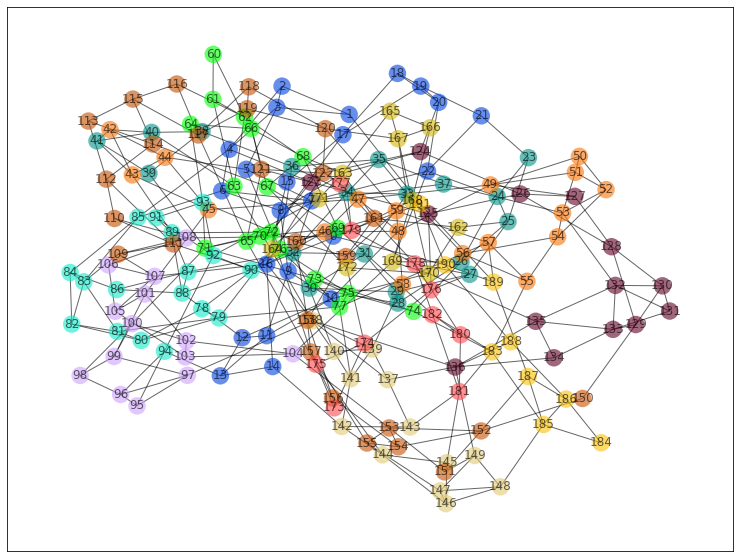

In [26]:
### ---  Visualisation of the communities
plt.figure(1,figsize=(13, 10))

pos = nx.layout.spring_layout(G)

colors =['#0343df','#029386','#f97306','#01ff07','#13eac9',
         '#cea2fd','#c04e01','#610023','#e2ca76','#c65102',
         '#d5b60a','#ff474c','#fac205', '#650021', '#ffb07c', '#ceb301' ]

color_map = []
for i in range(len(communities)):
    for node in G.nodes():
        if node in communities[i]:
            color_map.append(colors[i])

options = {'node_color': color_map,
           'alpha': 0.6,
           'width': 1,
           'linewidths': 0.1,
           'with_labels': True,
           'font_color': 'black'}

nx.draw_networkx(G, pos = pos, **options)

### ---  show th figure
plt.show()

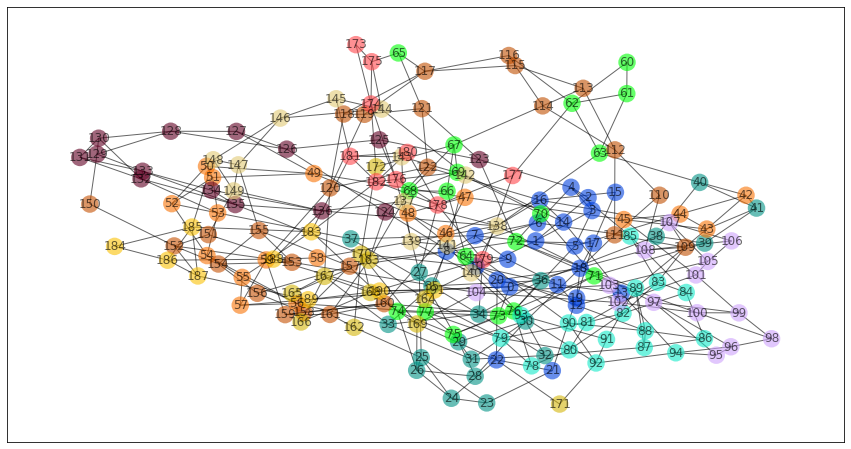

In [29]:
### --- Visualisation of the communities

plt.figure(1,figsize=(15,8))

pos = nx.layout.spring_layout(G)

colors =['#0343df','#029386','#f97306','#01ff07','#13eac9',
         '#cea2fd','#c04e01','#610023','#e2ca76','#c65102',
         '#d5b60a','#ff474c','#fac205', '#650021', '#ffb07c', '#ceb301']


color_map = []
for i in range(len(communities)):
    for node in G.nodes():
        if node in communities[i]:
            color_map.append(colors[i])

options = {'node_color': color_map,
           'alpha': 0.6,
           'width': 1,
           'linewidths': 0.1,
           'with_labels': True,
           'font_color': 'black'}

nx.draw_networkx(G, pos = pos, **options)

plt.show()

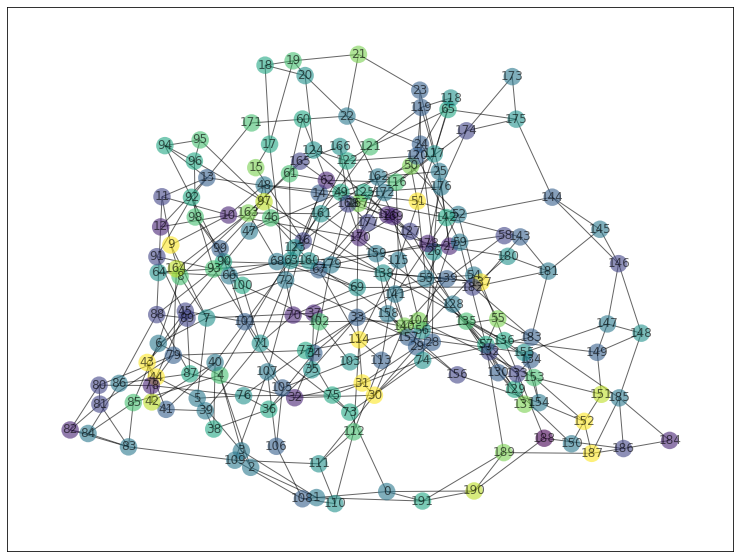

In [28]:
### ---  Visualisation of the communities preferences for ai
plt.figure(1,figsize=(13, 10))

pos = nx.layout.spring_layout(G)



options = {'node_color': df['ai'],
           'alpha': 0.6,
           'width': 1,
           'linewidths': 0.1,
           'with_labels': True,
           'font_color': 'black'}

nx.draw_networkx(G, pos = pos, **options )

### --- show th figure
plt.show()

### Adding the position coordinates to our nodes.

In [30]:
### ---  adding the new column of the coordinates in our existing dataframe
df['position'] = df[['x_pos', 'y_pos']].apply(tuple, axis=1)
df.T

0       1       2       3       4       5       6       7  \
ai              4       4       4       4       7       4       4       5   
x_pos           1       1       1       1       1       1       1       1   
y_pos           0       1       2       3       4       5       6       7   
Community      13       1       1       1       1       1       1       1   
position   (1, 0)  (1, 1)  (1, 2)  (1, 3)  (1, 4)  (1, 5)  (1, 6)  (1, 7)   

                8       9  ...      182      183      184      185       186  \
ai              7      10  ...        2        3        1        4         2   
x_pos           1       1  ...       22       22       22       22        22   
y_pos           8       9  ...        6        7        8        9        10   
Community       1       6  ...        7        7       13       13        13   
position   (1, 8)  (1, 9)  ...  (22, 6)  (22, 7)  (22, 8)  (22, 9)  (22, 10)   

                187       188       189       190       191  
ai               10         0         8         9         6  
x_pos            22        22        22        22        22  
y_pos            11        12        13        14        15  
Community        13        13        13        13        13  
position   (22, 11)  (22, 12)  (22, 13)  (22, 14)  (22, 15)  

[5 rows x 192 columns]

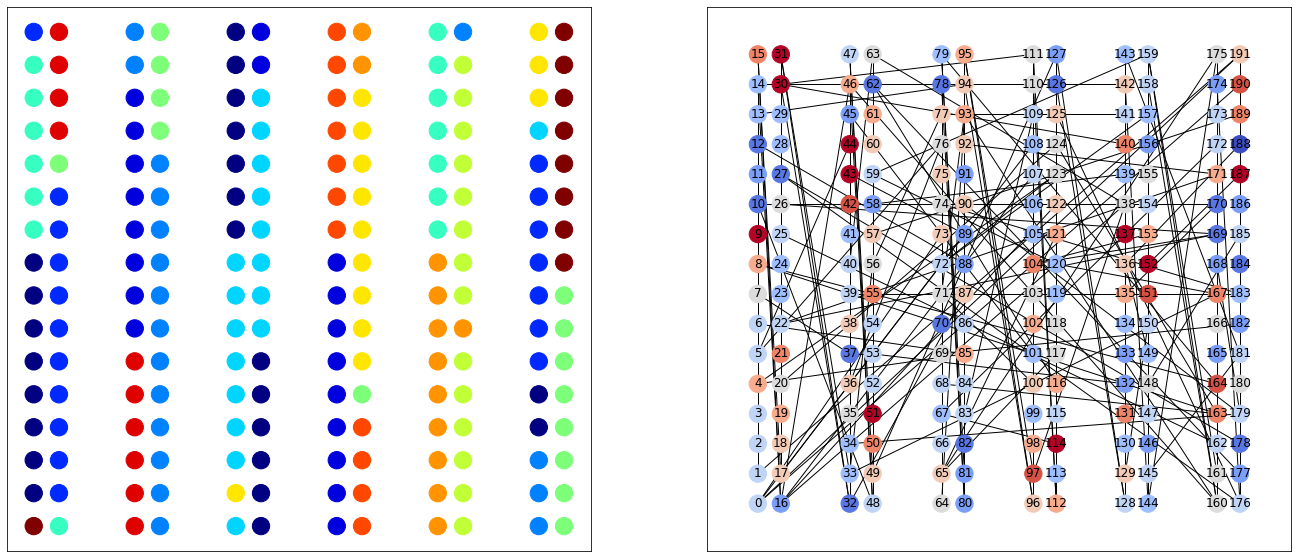

In [31]:
### ---  Visualisation based on the position of each node and the community that belongs to
fig = plt.figure(1,figsize=(23,10))
ax0 = fig.add_subplot(1, 2, 1)
ax1 = fig.add_subplot(1, 2, 2)

pos = nx.layout.spring_layout(G)
### ---  coordinate and communities
nx.draw_networkx_nodes(G, pos = df['position'], node_color= df['Community'].apply(lambda x: int(x)-1), cmap=plt.cm.jet, ax = ax0)
### ---  coordinates and ai preference
nx.draw_networkx(G, pos = df['position'], node_color = df['ai'], cmap = plt.cm.coolwarm, with_labels = True, ax = ax1) 
### ---  dark red means its more possible adopting


plt.show()

#### Before moving to our next step, let's analyse if distance between nodes in the trading floor(in combination with the community), play a significant role in adopting AI or no.

In [32]:
### ---  dyadic similarity (based on preferences on adopting ai or no)
starting_point = []
ending_point = []
similarity = {}
score = [] 
for u, v in G.edges():
    key = "{}-{}".format(u, v)
    starting_point.append(u)
    ending_point.append(v)
    value = np.abs(G.nodes[u]["ai"] - G.nodes[v]["ai"])
    similarity[key] = value
    score.append(value) 
### ---  score of similarity between the two nodes

In [33]:
### ---  creating a dataframe of the starting, ending point and the score of similarity between these two nodes
df_similarity = pd.DataFrame()
df_similarity['starting_point'] = starting_point
df_similarity['ending_point'] = ending_point
df_similarity['score'] = score
df_similarity.head()

starting_point ending_point  score
0              0          191      2
1              0          190      5
2              0          108      1
3              0           73      2
4              1            2      0

### Where score, is the similarity score meaning how much difference in the preference of adopting AI two nodes have

In [34]:
### ---  creating a new dataframe with a starting-ending point (based on the x_pos and y_pos)
starting_x = []
starting_y = []
ending_x = []
ending_y = []
for i in starting_point:
    starting_x.append(df['x_pos'][i])
for i in starting_point:
    starting_y.append(df['y_pos'][i])
for i in ending_point:
    ending_x.append(df['x_pos'][i])
for i in ending_point:
    ending_y.append(df['y_pos'][i])

df_similarity['starting_x'] = starting_x
df_similarity['starting_y'] = starting_y
df_similarity['ending_x'] = ending_x
df_similarity['ending_y'] = ending_y

df_similarity.head()

starting_point ending_point  score  starting_x  starting_y  ending_x  \
0              0          191      2           1           0        22   
1              0          190      5           1           0        22   
2              0          108      1           1           0        13   
3              0           73      2           1           0         9   
4              1            2      0           1           1         1   

   ending_y  
0        15  
1        14  
2        12  
3         9  
4         2

In [35]:
### ---  preparing to calculate the distance between the nodes
df_similarity['sq'] = ((df_similarity['starting_x'] - df_similarity['ending_x']) ** 2 + (df_similarity['starting_y'] - df_similarity['ending_y']) ** 2)

In [36]:
### ---  distance
df_similarity['distance'] = (df_similarity['sq']) ** 0.5
df_similarity.head()

starting_point ending_point  score  starting_x  starting_y  ending_x  \
0              0          191      2           1           0        22   
1              0          190      5           1           0        22   
2              0          108      1           1           0        13   
3              0           73      2           1           0         9   
4              1            2      0           1           1         1   

   ending_y   sq   distance  
0        15  666  25.806976  
1        14  637  25.238859  
2        12  288  16.970563  
3         9  145  12.041595  
4         2    1   1.000000

In [37]:
### ---  dropping unnecessary column
df_similarity.drop(['sq'], axis = 1)

starting_point ending_point  score  starting_x  starting_y  ending_x  \
0                0          191      2           1           0        22   
1                0          190      5           1           0        22   
2                0          108      1           1           0        13   
3                0           73      2           1           0         9   
4                1            2      0           1           1         1   
..             ...          ...    ...         ...         ...       ...   
379            187          189      2          22          11        22   
380            188          190      9          22          12        22   
381            189          190      1          22          13        22   
382            189          191      2          22          13        22   
383            190          191      3          22          14        22   

     ending_y   distance  
0          15  25.806976  
1          14  25.238859  
2          12  16.970563  
3           9  12.041595  
4           2   1.000000  
..        ...        ...  
379        13   2.000000  
380        14   2.000000  
381        14   1.000000  
382        15   2.000000  
383        15   1.000000  

[384 rows x 8 columns]

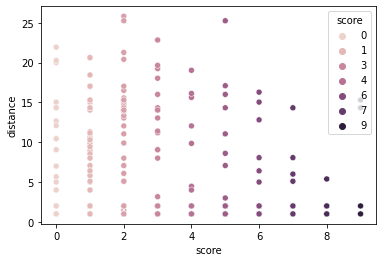

In [38]:
### ---  visualise distance - similarity
sns.scatterplot(x = 'score', y = 'distance', hue = 'score',data = df_similarity)

In [39]:
### ---  running OLS regression
x = df_similarity['score']
y = df_similarity['distance']
FML = 'y ~ x'
OLS = smf.ols(FML, data = df_similarity).fit()
print(OLS.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.003
Method:                 Least Squares   F-statistic:                   0.03668
Date:                Sun, 26 Jun 2022   Prob (F-statistic):              0.848
Time:                        08:22:31   Log-Likelihood:                -1222.2
No. Observations:                 384   AIC:                             2448.
Df Residuals:                     382   BIC:                             2456.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.8162      0.463     10.405      0.0

# Diffusion and Cascading 

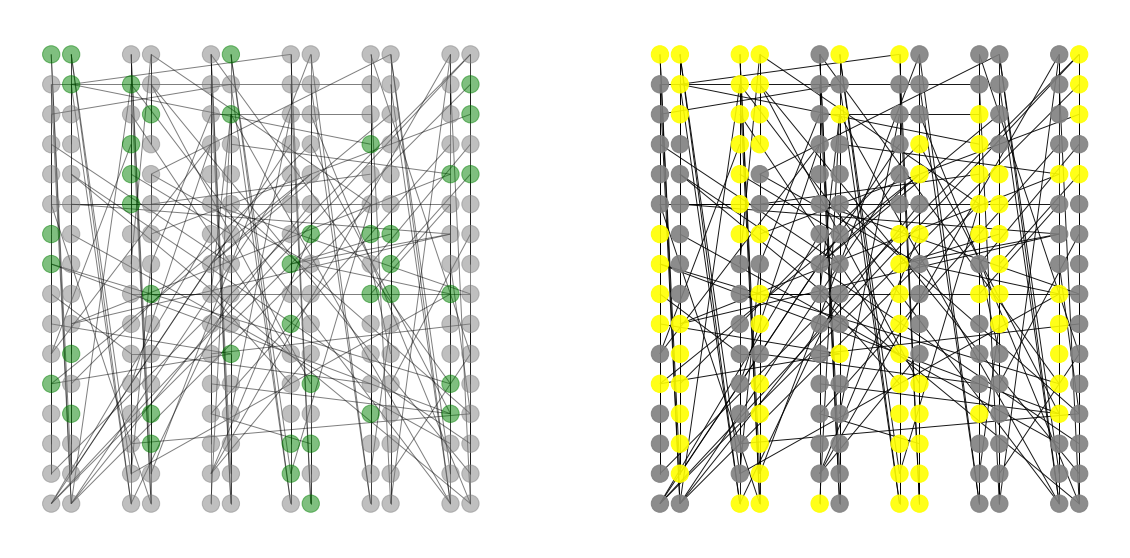

In [41]:
### ---  evaluating the ealry adopters or no by setting a threshold of 7 and upper
df['Adopters'] = (df['ai'] >= 7)

p = df['Adopters']
for i in sorted(G.nodes()):
    G.nodes[i]['adopting'] = p[i]

colors = []
for i in G.nodes():
    if G.nodes[i]['adopting'] == True:
        colors.append('green')
    else:
        colors.append('grey')
### ---  creating the figure
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(1, 2, 1)
ax0 = fig.add_subplot(1, 2, 2)
ax.axis('off')

nx.draw_networkx(G, pos = df['position'], with_labels=False, node_color = colors, 
                    edge_color = 'black', ax = ax, alpha = 0.5)
### ---  initialize the diffusion process
### ---  pay-off of adopting the new behavior
a = 1.2
### ---  pay-off of the status (not changing)
b = 1
### ---  nodes making decisions
for focal in G.nodes:
    ### ---  count adopting neighbors
    focal_nbrs = list(G.neighbors(focal))
    p = np.sum([G.nodes[nbr]['adopting'] for nbr in focal_nbrs])
    ### ---  pay-off of adopting new behavior
    d = G.degree(focal)
    a_payoff = p * a
    b_payoff = (d - p ) * b
    ### ---  decision to adopt
    if (G.nodes[focal]['adopting'] == False) & (a_payoff > b_payoff):
        G.nodes[focal]['adopting'] = True
    else:
        pass
### --- draw the network (yellow are the early adopters based on the score they range in ai column (>=7))
colors = []
for n in G.nodes():
    if G.nodes[n]['adopting'] == True:
        colors.append('yellow')
    else:
        colors.append('grey')

nx.draw(G, pos = df['position'], with_labels=False, 
        node_color = colors, ax = ax0, alpha = 0.9)


In [42]:
### ---  calculating the percentage of traders who have developed positive opinion towards AI
adopt_dict = nx.get_node_attributes(G, 'adopting')
adopt = []
for i in adopt_dict.values():
    adopt.append(i)

print(str(round(np.mean(adopt) * 100)) + "% of the traders have a positive opinion towards AI.")

42% of the traders have a positive opinion towards AI.


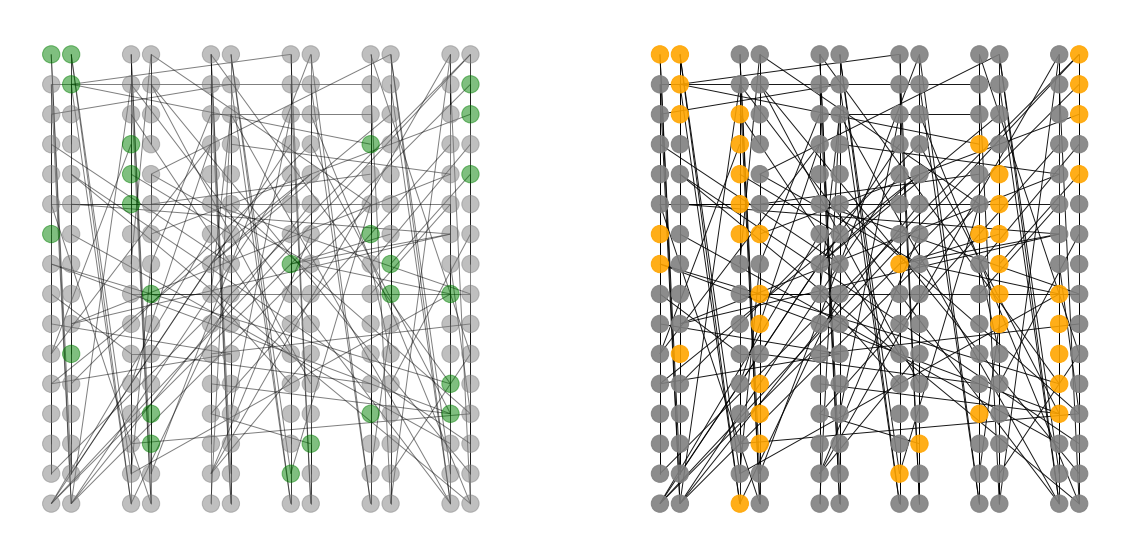

In [44]:
### ---  evaluating the ealry adopters or no by setting a threshold of 8 and upper
df['Adopters'] = (df['ai'] >= 8)

p = df['Adopters']
for i in sorted(G.nodes()):
    G.nodes[i]['adopting'] = p[i]

colors = []
for i in G.nodes():
    if G.nodes[i]['adopting'] == True:
        colors.append('green')
    else:
        colors.append('grey')
### ---  creating the figure
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(1, 2, 1)
ax0 = fig.add_subplot(1, 2, 2)
ax.axis('off')

nx.draw_networkx(G, pos = df['position'], with_labels=False, node_color = colors, 
                    edge_color = 'black', ax = ax, alpha = 0.5)
### ---  initialize the diffusion process
### ---  pay-off of adopting the new behavior
a = 1.2
### ---  pay-off of the status (not changing)
b = 1
### --- nodes making decisions
for focal in G.nodes:
    ### ---  count adopting neighbors
    focal_nbrs = list(G.neighbors(focal))
    p = np.sum([G.nodes[nbr]['adopting'] for nbr in focal_nbrs])
    ### ---  pay-off of adopting new behavior
    d = G.degree(focal)
    a_payoff = p * a
    b_payoff = (d - p ) * b
    ### --- decision to adopt
    if (G.nodes[focal]['adopting'] == False) & (a_payoff > b_payoff):
        G.nodes[focal]['adopting'] = True
    else:
        pass
### ---  draw the network (orange are the early adopters based on the score they range in ai column (>=8))

colors = []
for n in G.nodes():
    if G.nodes[n]['adopting'] == True:
        colors.append('orange')
    else:
        colors.append('grey')

nx.draw(G, pos = df['position'], with_labels=False, 
        node_color = colors, ax = ax0, alpha = 0.9)

In [45]:
### ---  calculating the percentage of traders who have developed positive opinion towards AI
adopt_dict = nx.get_node_attributes(G, 'adopting')
adopt = []
for i in adopt_dict.values():
    adopt.append(i)

print(str(round(np.mean(adopt) * 100)) + "% of the traders have a positive opinion towards AI.")

21% of the traders have a positive opinion towards AI.


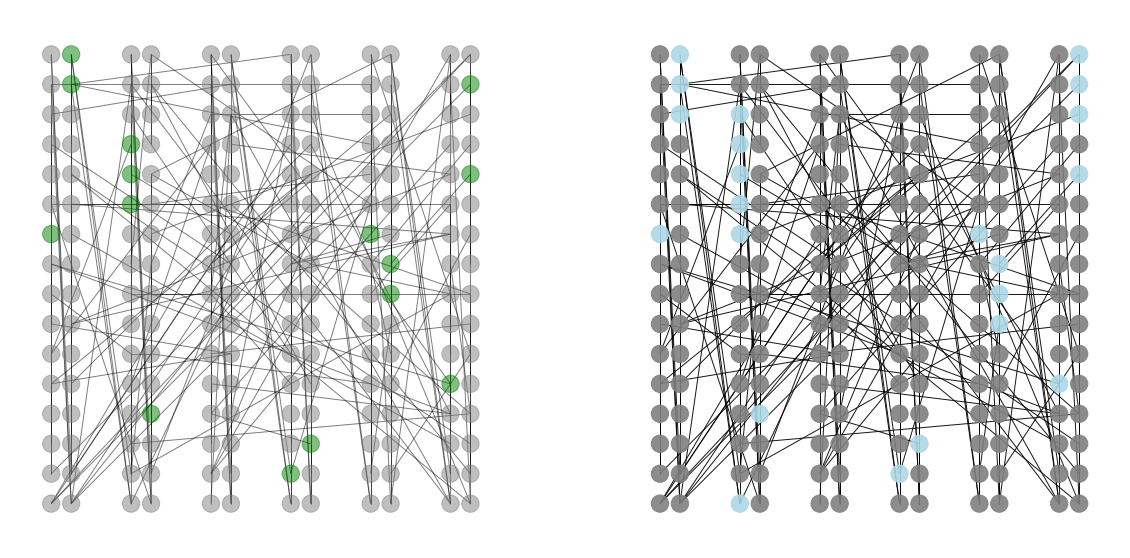

In [47]:
### ---  evaluating the ealry adopters or no by setting a threshold of 9 and upper
df['Adopters'] = (df['ai'] >= 9)

p = df['Adopters']
for i in sorted(G.nodes()):
    G.nodes[i]['adopting'] = p[i]

colors = []
for i in G.nodes():
    if G.nodes[i]['adopting'] == True:
        colors.append('green')
    else:
        colors.append('grey')
### ---  creating the figure
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(1, 2, 1)
ax0 = fig.add_subplot(1, 2, 2)
ax.axis('off')

nx.draw_networkx(G, pos = df['position'], with_labels=False, node_color = colors, 
                    edge_color = 'black', ax = ax, alpha = 0.5)
### ---  initialize the diffusion process
### ---  pay-off of adopting the new behavior
a = 1.2
### ---  pay-off of the status (not changing)
b = 1
### ---  nodes making decisions
for focal in G.nodes:
    ### ---  count adopting neighbors
    focal_nbrs = list(G.neighbors(focal))
    p = np.sum([G.nodes[nbr]['adopting'] for nbr in focal_nbrs])
    ### ---  pay-off of adopting new behavior
    d = G.degree(focal)
    a_payoff = p * a
    b_payoff = (d - p ) * b
    ### ---  decision to adopt
    if (G.nodes[focal]['adopting'] == False) & (a_payoff > b_payoff):
        G.nodes[focal]['adopting'] = True
    else:
        pass
### ---  draw the network (lightblue are the early adopters based on the score they range in ai column (>=9))

colors = []
for n in G.nodes():
    if G.nodes[n]['adopting'] == True:
        colors.append('lightblue')
    else:
        colors.append('grey')

nx.draw(G, pos = df['position'], with_labels=False, 
        node_color = colors, ax = ax0, alpha = 0.9)

In [48]:
### ---  calculating the percentage of traders who have developed positive opinion towards AI
adopt_dict = nx.get_node_attributes(G, 'adopting')
adopt = []
for i in adopt_dict.values():
    adopt.append(i)

print(str(round(np.mean(adopt) * 100)) + "% of the traders have a positive opinion towards AI.")

11% of the traders have a positive opinion towards AI.
